<a href="https://colab.research.google.com/github/FelixMedrano/Intro-to-artificial-intelligence/blob/main/Module_09_artificial_neural_networks/A5_medranof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 4630 - Intro to AI
## Summer 2021 - Dr Marques
## Assignment 5

Deep learning solutions for: 
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

A working version of this code is available in colab:

https://colab.research.google.com/drive/11oJMqTrTRUh5rct332x192nRnifIHTQj?usp=sharing


Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb 
- https://developers.google.com/machine-learning/guides/text-classification/
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

#### (OPTIONAL) TODO 1

Add your own sources and references here.

## Setup

In [16]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture. 

### Load and prepare the data

In [17]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [18]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [19]:
train_labels[0]

1

In [20]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [21]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [22]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [24]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### (OPTIONAL) TODO 2

Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

### Building your model

#### Model definition

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [26]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 32ms/step - loss: 0.5241 - accuracy: 0.7873 - val_loss: 0.4085 - val_accuracy: 0.8523
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3181 - accuracy: 0.9011 - val_loss: 0.3126 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2296 - accuracy: 0.9285 - val_loss: 0.2813 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1804 - accuracy: 0.9426 - val_loss: 0.2755 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1481 - accuracy: 0.9527 - val_loss: 0.2909 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1232 - accuracy: 0.9617 - val_loss: 0.2908 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1030 - accuracy: 0.9698 - val_loss: 0.3263 - val_accuracy: 0.8821
Epoch 8/20
30

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

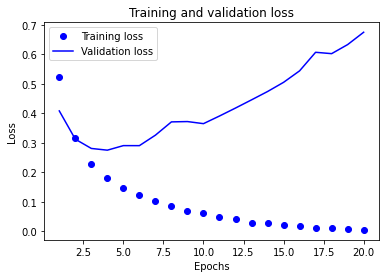

In [30]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

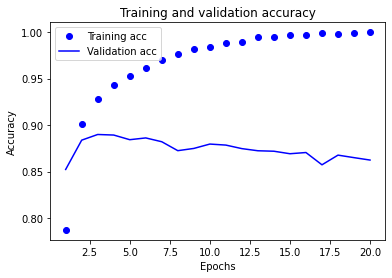

In [31]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 3

Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

Comment on the mistakes and what you believe might have caused each of them. 

### (OPTIONAL) TODO 4

Write code to try different combinations of:
- numbers of hidden layers and units per layer 
- loss functions
- activation functions

Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

### Retraining a model from scratch

In [32]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4515 - accuracy: 0.8301
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2624 - accuracy: 0.9101
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2024 - accuracy: 0.9269
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3052 - accuracy: 0.8776


### Using a trained model to generate predictions on new data

In [33]:
model.predict(x_test)

array([[0.18338269],
       [0.9996753 ],
       [0.63927436],
       ...,
       [0.06207733],
       [0.07034046],
       [0.44174525]], dtype=float32)

## PART 2 - Multiclass classification of newswires using the Reuters dataset

Once again, we will start with a simple solution using a fully-connected neural network architecture. 

### The Reuters dataset

#### Loading the Reuters dataset

In [34]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [35]:
len(train_data)

8982

In [36]:
len(test_data)

2246

In [37]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [38]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [39]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [41]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [42]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [43]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [44]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [45]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.5858 - accuracy: 0.5451 - val_loss: 1.7058 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3785 - accuracy: 0.7149 - val_loss: 1.2826 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0176 - accuracy: 0.7791 - val_loss: 1.1075 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7955 - accuracy: 0.8271 - val_loss: 1.0417 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6327 - accuracy: 0.8678 - val_loss: 0.9505 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5018 - accuracy: 0.8948 - val_loss: 0.9151 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4029 - accuracy: 0.9168 - val_loss: 0.9569 - val_accuracy: 0.8040
Epoch 8/20
16

#### Plotting the training and validation loss

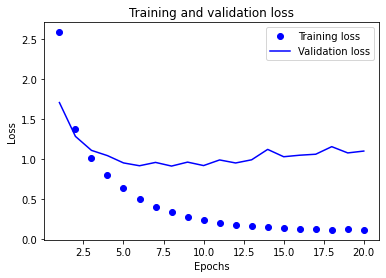

In [47]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

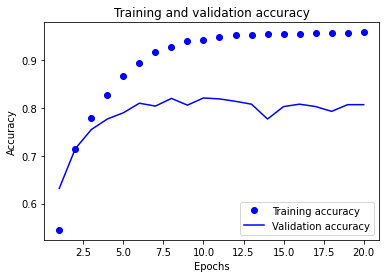

In [48]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 5

Write code to try different combinations of:
- numbers of hidden layers and units per layer 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

### Retraining a model from scratch

In [49]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.4779 - accuracy: 0.5155
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3622 - accuracy: 0.7104
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.0199 - accuracy: 0.7820
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.8107 - accuracy: 0.8248
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6480 - accuracy: 0.8595
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5278 - accuracy: 0.8830
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4276 - accuracy: 0.9084
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3490 - accuracy: 0.9255
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9430 - accuracy: 0.7898


In [50]:
results

[0.9430033564567566, 0.7898486256599426]

In [51]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1856634016028495

### Generating predictions on new data

In [52]:
predictions = model.predict(x_test)

In [53]:
predictions[0].shape

(46,)

In [54]:
np.sum(predictions[0])

1.0

In [55]:
np.argmax(predictions[0])

4

## PART 3 - Regression for house price estimation using the Boston Housing Price dataset

### The Boston Housing Price dataset

#### Loading the Boston housing dataset

In [56]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [57]:
train_data.shape

(404, 13)

In [58]:
test_data.shape

(102, 13)

In [59]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [60]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

#### Model definition

In [61]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

In [62]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [63]:
all_scores

[1.8576362133026123, 2.382404327392578, 2.424639940261841, 2.4216909408569336]

In [64]:
np.mean(all_scores)

2.271592855453491

#### Saving the validation logs at each fold

In [65]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### Building the history of successive mean K-fold validation scores

In [66]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

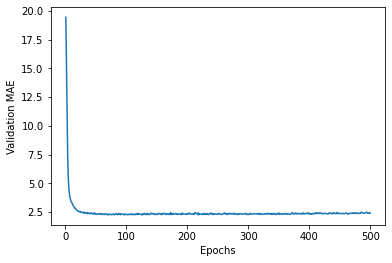

In [67]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

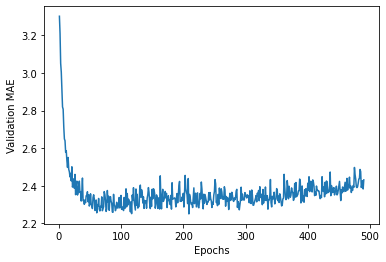

In [68]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [69]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.3467 - mae: 2.5222


In [70]:
test_mae_score

2.522247552871704

### Generating predictions on new data

In [71]:
predictions = model.predict(test_data)
predictions[0]

array([7.573135], dtype=float32)

### (OPTIONAL) TODO 6

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

### CONCLUSIONS

***Part 1:***

**(1)What type of preprocessing was applied to the raw input data? Why was it necessary to do so?**

- The type of preprocessing that is applied to the raw input data is multi-hot encoding. This is done because data can sometimes be in a format that the algorithm is not able to handle properly. As was seen in the textbook, here the data is being vectorized so that it is easier to handle and manipulate

**(2)Does your model suffer from overfitting?If so, what would you suggest doing about it?**

- From the graphs we can see that our model is overfitting since the training loss is lower than the validating loss. One possible solution is training the network with more examples, or maybe changing the complexity of the NN, whether that be by changing the amount of weigths or the value of the weights

**(3)Is accuracy a good metric of success in this case? Why (not)?**

- In this case, accuracy is not a good metric of success since we saw that our model is overfit and the gap between training accuracy and validation accuracy is too great



***Part 2:***

**(1)What type of preprocessing was applied to the raw input data? Why was it necessary to do so?**

- In this instance the preprocessing that is done to the raw input data is one-hot encoding which much like in part1 is vectorizing the labels and enumerating them so the machine is able to handle the data better. 

**(2)How many categories are there in this case?**

-In this case there are 20 categories

**(3)Does your model suffer from overfitting?If so, what would you suggest doing about it?**

- From the graphs we can see that our model is overfitting since the training loss is lower than the validating loss. One possible solution is training the network with more examples, or maybe changing the complexity of the NN, whether that be by changing the amount of weigths or the value of the weights

**(4)Is accuracy a good metric of success in this case? Why (not)?**

- In this case, accuracy is not a good metric of success since we saw that our model is overfit and the gap between training accuracy and validation accuracy is too great


***Part 3:***

**(1)What type of preprocessing was applied to the raw input data? Why was it necessary to do so?**

- In this case the data is nomalized so that the ranges of the data do not vary too much. This makes it easier for the machine to handle the input. 

**(2)Why is this problem a case of regression(rather than classification)?**

- Classification deals with predicting a discrete class label outputs while this one is trying to predict a continous quantity output. 


**(3)Does your model suffer from overfitting?If so, what would you suggest doing about it?**

- I believe it does since the MAE is increasing. Although it is lower than it was in the beginning we can see that overall it is slowly increasing. To combat this we may try regularization, reducing parameters, or even having less epochs. 

**(4)Is mean absolute error(MAE)a good metric of success in this case? Why (not)?**

- In this case MAE is a good metric of success since it measures the average magnitude of errors in the prediction. This helps us see how well the neural network performed since we can see the errors found.

## Lesson Learned

From this assignment I was able to dive deeper into deep learning and see what capabilities neural networks had to offer. This assignment was able to clear up concepts introduced in the textbook and allowed me to play around with the ideas explained. Each step was broken down and explained very well and the flow of information was easy to understand.